In [1]:
################################### Bike rental count ##############################################

In [2]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
#set current working directory
os.chdir("C:/Users/nikhi/Desktop/Bike-Rental-Prediction-master")

In [4]:
#cross-check working directory
os.getcwd()

'C:\\Users\\nikhi\\Desktop\\Bike-Rental-Prediction-master'

In [5]:
#Loading the data
bike_rental =  pd.read_csv("Day.csv", index_col = 0)

In [6]:
#deleted atemp variable as it contributes similar info in temp variable (feature selection)

In [7]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 14 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 85.7+ KB


In [8]:
bike_rental.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
########################### data pre-processing ################

In [10]:
#################### 1. exploratory data analysis ##################

In [11]:
#Converting the variables to required data format 

bike_rental['dteday'] = pd.to_datetime(bike_rental['dteday'],yearfirst=True)

bike_rental['season'] = bike_rental['season'].astype('category')
bike_rental['yr'] = bike_rental['yr'].astype('category')
bike_rental['mnth'] = bike_rental['mnth'].astype('category')
bike_rental['holiday'] = bike_rental['holiday'].astype('category')
bike_rental['weekday'] = bike_rental['weekday'].astype('category')
bike_rental['workingday'] = bike_rental['workingday'].astype('category')
bike_rental['weathersit'] = bike_rental['weathersit'].astype('category')


In [12]:
bike_rental['temp'] = bike_rental['temp'].astype('float')
bike_rental['hum'] = bike_rental['hum'].astype('float')
bike_rental['windspeed'] = bike_rental['windspeed'].astype('float')
bike_rental['casual'] = bike_rental['casual'].astype('float')
bike_rental['registered'] = bike_rental['registered'].astype('float')
bike_rental['cnt'] = bike_rental['cnt'].astype('float')

In [13]:
############# 2. Missing Value Analysis ###########

In [14]:
#creating a dataframe with sum of missing values
missing_val = pd.DataFrame(bike_rental.isnull().sum())

In [15]:
missing_val

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
hum,0


In [16]:
#There is no missing value in the dataframe

In [17]:
############################## 3. outlier analysis #################

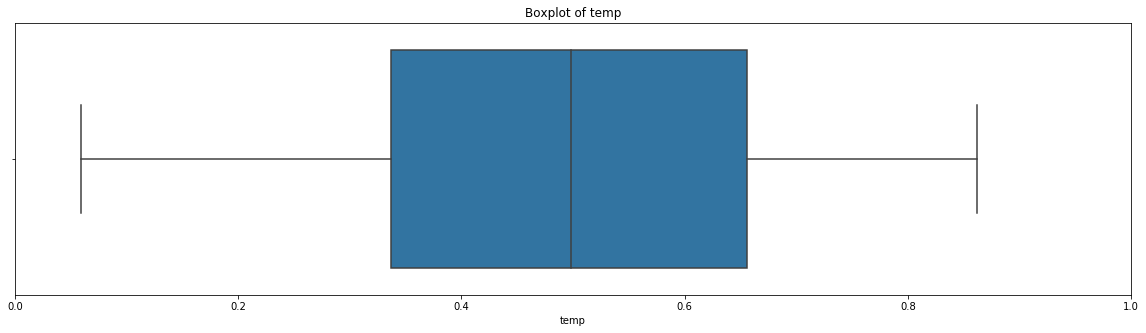

In [18]:
#1.temp variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,1)
sns.boxplot(x=bike_rental['temp'],data=bike_rental,orient='h')
plt.title('Boxplot of temp')

plt.show()

In [19]:
# there is no outlier in temp variable

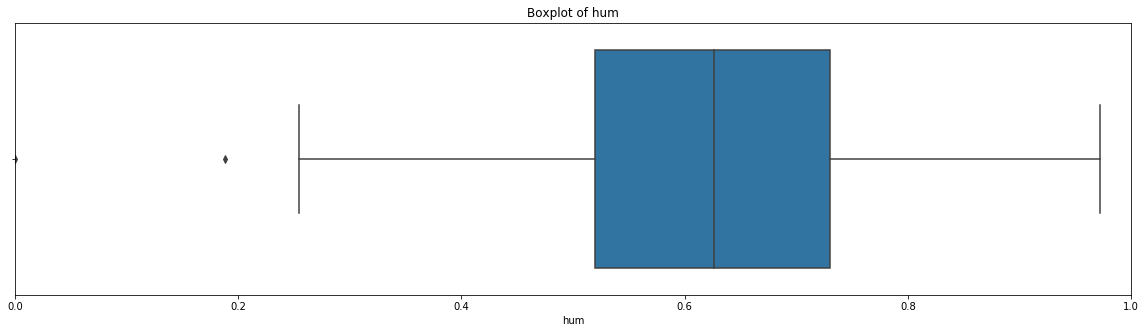

In [20]:
#2.hum variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,1)
sns.boxplot(x=bike_rental['hum'],data=bike_rental,orient='h')
plt.title('Boxplot of hum')

plt.show()

In [21]:
#there is a negative outlier in hum variable

In [22]:
sum(bike_rental['hum']<0.27)/len(bike_rental['hum'])*100

0.4103967168262654

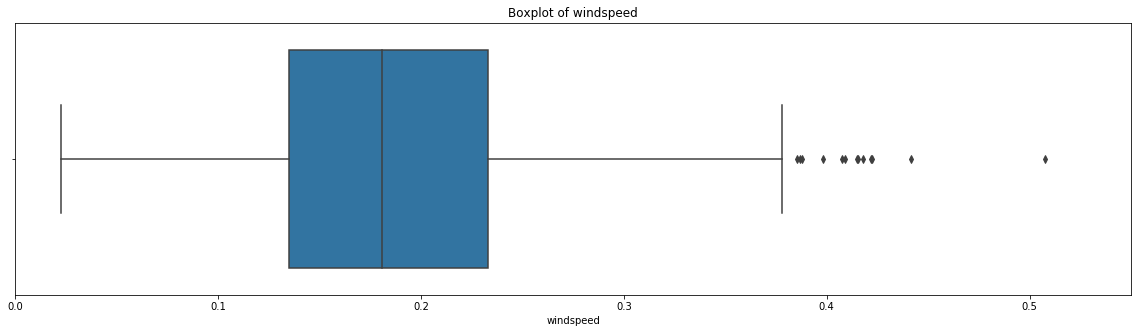

In [23]:
#3.windspeed variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,0.55)
sns.boxplot(x=bike_rental['windspeed'],data=bike_rental,orient='h')
plt.title('Boxplot of windspeed')

plt.show()

In [24]:
#there is a positive outlier in windspeed variable

In [25]:
sum(bike_rental['windspeed']>0.37)/len(bike_rental['windspeed'])*100

2.3255813953488373

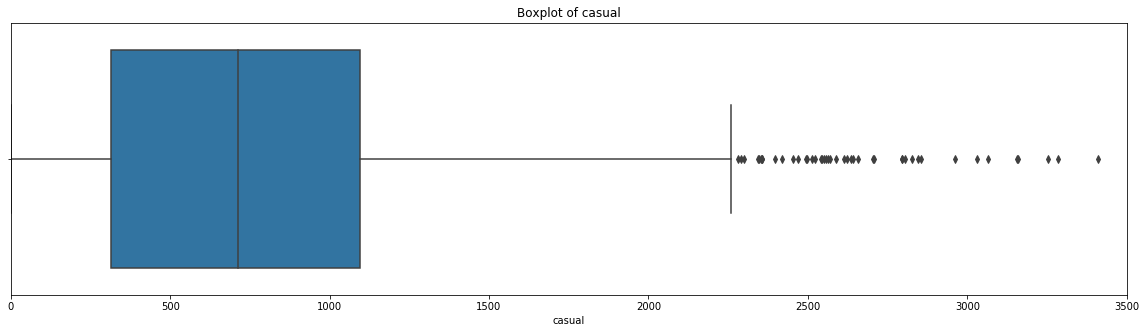

In [26]:
#4. casual variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,3500)
sns.boxplot(x=bike_rental['casual'],data=bike_rental,orient='h')
plt.title('Boxplot of casual')

plt.show()

In [27]:
#there is a positive outlier in casual variable

In [28]:
sum(bike_rental['casual']>2250)/len(bike_rental['casual'])*100

6.292749658002736

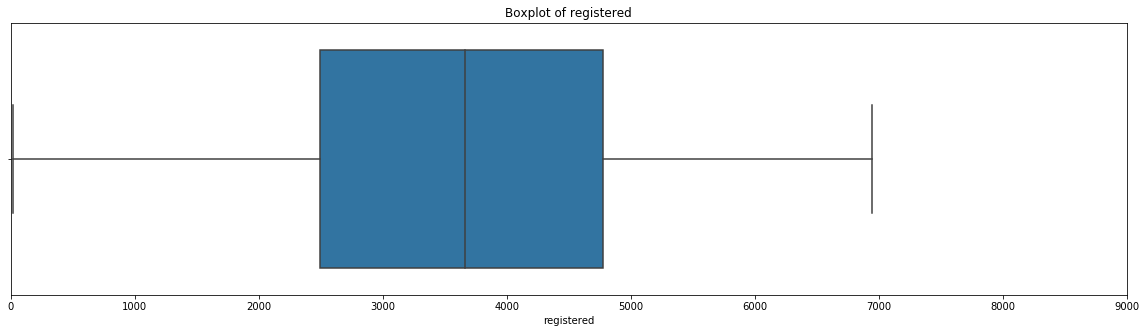

In [29]:
#5. registered variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,9000)
sns.boxplot(x=bike_rental['registered'],data=bike_rental,orient='h')
plt.title('Boxplot of registered')

plt.show()

In [30]:
#there is no outlier in registered variable

In [31]:
#detect and delete outliers

In [32]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(bike_rental.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,i] < min].index)
bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,'casual'] > max].index)

-855.25
2266.75


In [33]:
cnames = ['hum']
for i in cnames:
    q75, q25 = np.percentile(bike_rental.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,i] < min].index)
bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,'hum'] > max].index)

0.19999974999999992
1.0533337500000002


In [34]:
cnames = ['windspeed']
for i in cnames:
    q75, q25 = np.percentile(bike_rental.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,i] < min].index)
bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,'windspeed'] > max].index)

-0.012456500000000065
0.38062750000000006


In [35]:
bike_rental.shape

(673, 14)

In [36]:
######################### 4. feature selection ################

In [37]:
#correlation analysis

#continous variables
cnames = ['temp','hum', 'windspeed', 'casual', 'registered','cnt']

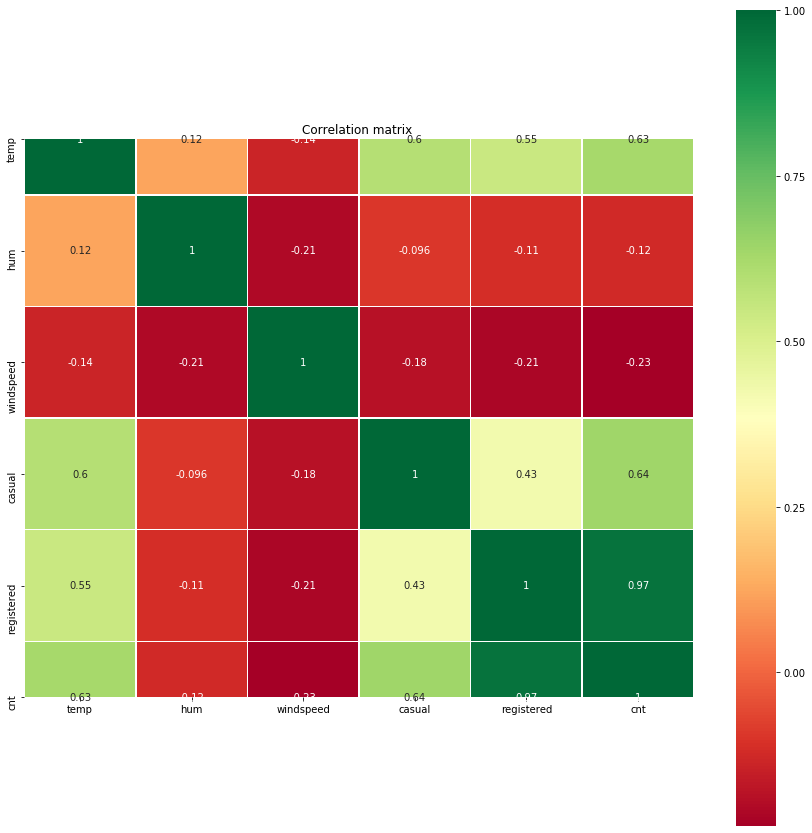

In [38]:
#Plot using seaborn library
plt.figure(figsize=(15,15))
_ = sns.heatmap(bike_rental[cnames].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [39]:
#Removing workingday because they dont contribute much to the independent variable
bike_rental = bike_rental.drop(['workingday'], axis =1)

In [40]:
#we cannot carry out chi-square test as target variable (cnt) is continous in nature

In [41]:
#ANOVA for categorical variables

In [42]:
model = ols('cnt ~ C(season)+C(yr)+C(mnth)+C(weekday)+C(holiday)+C(weathersit)',data=bike_rental).fit()

In [43]:
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,8.201685e+08,2.733895e+08,428.924243,2.005383e-153
C(yr),1.0,7.299401e+08,7.299401e+08,1145.212172,2.326049e-145
C(mnth),11.0,1.612817e+08,1.466197e+07,23.003352,5.525170e-40
C(weekday),6.0,2.470288e+07,4.117146e+06,6.459443,1.252947e-06
C(holiday),1.0,4.906127e+06,4.906127e+06,7.697284,5.689739e-03
C(weathersit),2.0,1.789559e+08,8.947797e+07,140.383120,2.231628e-51
Residual,648.0,4.130249e+08,6.373841e+05,NaN,NaN


In [44]:
#Every variable has p-value less than 0.05 therefore we reject the null hypothesis.

In [45]:
############################# 5. feature scaling ##################

In [46]:
gnames =['casual', 'registered']

In [47]:
for i in gnames:
    print(i)
    bike_rental[i] = (bike_rental[i] - bike_rental[i].min())/(bike_rental[i].max() - bike_rental[i].min())

casual
registered


In [48]:
bike_rental.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,2,0.344167,0.805833,0.160446,0.145833,0.091539,985.0
2,2011-02-01,1,0,1,0,0,2,0.363478,0.696087,0.248539,0.057181,0.093849,801.0
3,2011-03-01,1,0,1,0,1,1,0.196364,0.437273,0.248309,0.052305,0.174560,1349.0
4,2011-04-01,1,0,1,0,2,1,0.200000,0.590435,0.160296,0.046986,0.207046,1562.0
5,2011-05-01,1,0,1,0,3,1,0.226957,0.436957,0.186900,0.035461,0.216286,1600.0


In [49]:
############# machine learning algorithm ###########

In [50]:
train, test = train_test_split(bike_rental, test_size=0.25)

In [51]:
train_features = train[['season','yr','mnth','weekday','holiday','weathersit','temp','windspeed','casual', 'registered']].values
train_target = train['cnt'].values

test_features = test[['season','yr','mnth','weekday','holiday','weathersit','temp','windspeed', 'casual', 'registered']].values
test_target = test['cnt'].values

In [ ]:
####################### 1. linear regression #####################

In [ ]:
#train the model using traing data sets
lm_model = sm.OLS(train_target, train_features.astype(float)).fit()

In [ ]:
#Summary of model
lm_model.summary()

In [ ]:
#predict the  model
lm_predict = lm_model.predict(test_features)

In [ ]:
#MAPE is considered for evaluation since it gives error in terms of percentage and it is easy to compare between all the models

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
#evaluate model using MAPE
MAPE(test_target, lm_predict)

In [ ]:
#MAPE  for linear regression model is = 0.09

In [ ]:
################################## 2. decision tree ####################

In [ ]:
#train the model using traing data sets
dt_model = DecisionTreeRegressor(max_depth =2).fit(train_features, train_target)

In [ ]:
#predict the  model
dt_predict = dt_model.predict(test_features)

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
#evaluate model using MAPE
MAPE(test_target, dt_predict)

In [ ]:
#max_depth = 12

In [ ]:
#train the model using traing data sets
dt_model = DecisionTreeRegressor(max_depth =12).fit(train_features, train_target)

In [ ]:
#predict the  model
dt_predict = dt_model.predict(test_features)

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
#evaluate model using MAPE
MAPE(test_target, dt_predict)

In [ ]:
#max_depth = 20

In [ ]:
#train the model using traing data sets
dt_model = DecisionTreeRegressor(max_depth =20).fit(train_features, train_target)

In [ ]:
#predict the  model
dt_predict = dt_model.predict(test_features)

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
#evaluate model using MAPE
MAPE(test_target, dt_predict)

In [ ]:
##MAPE  for decision tree model is = 3.32

In [ ]:
############################## 3. random forest #########################

In [ ]:
#train the model using traing data sets
rf_model = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features,train_target)

In [ ]:
#predict the  model
rf_predict= rf_model.predict(test_features)

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
#evaluate model using MAPE
MAPE(test_target, rf_predict)

In [ ]:
## MAPE for random forest is = 1.97

In [ ]:
#conclusion: linear regression model is considered as best because it has  less % of error